In [7]:
from uninaannpy import neural_network as nn
from uninaannpy import learning_functions as lnf
from uninaannpy import error_functions as errfun
from uninaannpy import activation_functions as actfun
from uninaannpy import datasets as ds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#Costruzione path del dataset
current_path = os.getcwd()
data_path = os.path.join(current_path, 'data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

#Lettura csv con pandas
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

#Estrapoliamo il numero di righe e di colonne di train e test
train_rows, train_cols = train_array.shape 
test_rows, test_cols = test_array.shape  

#Mescola casualmente i dati prima di suddividerli in set di sviluppo e training
np.random.shuffle(train_array)  
#Calcolo percentuale dati per il validation set
validation_percentage = 0.20
val_index = int(np.ceil(train_rows * validation_percentage))

#Distribuzione training, validation e test set
train_in, train_labels = ds.get_mnist_training(train_array, train_rows, train_cols, val_index)
validation_in, validation_labels = ds.get_mnist_validation(train_array, train_cols, val_index)
test_in, Ytest = ds.get_mnist_testing(test_array, test_cols, test_rows)

#Creazione rete neurale
#Assegnazione funzioni di attivazione per ogni strato della rete
hidden_activation_functions = [actfun.tanh]

#Assegnazione numero di neuroni per ogni strato
hidden_layers = [100]
#Assegnazione della funzione di attivazione e di errore per l'ultimo strato della rete
output_activation_function = actfun.identity
error_function = errfun.cross_entropy_softmax

#Estrazione input e target
input_layer_size = train_in.shape[0]
output_layer_size = train_labels.shape[0]
net = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)

#Copia la rete principale in una per il training
training_net=lnf.duplicate_network(net)
lnf.get_net_structure(training_net)

Numero di strati nascosti: 1
Dimensione dell'input: 784
Dimensione dell'output: 10
Neuroni negli strati nascosti: 100
Funzioni di attivazione: tanh, identity
Funzione di errore: cross_entropy_softmax


In [8]:
#batch training
train_err, validation_err, train_accuracy, validation_accuracy=lnf.train_neural_network(training_net, train_in, train_labels, validation_in, validation_labels, epochs=40, learning_rate=0.00001)


0/40
Training Accuracy: 6.3293%,
Validation Accuracy: 6.49221%

1/40
Training Accuracy: 27.31724%,
Validation Accuracy: 27.40228%

2/40
Training Accuracy: 64.32009%,
Validation Accuracy: 64.15535%

3/40
Training Accuracy: 50.68439%,
Validation Accuracy: 50.28752%

4/40
Training Accuracy: 47.59266%,
Validation Accuracy: 47.05392%

5/40
Training Accuracy: 66.49722%,
Validation Accuracy: 65.42212%

6/40
Training Accuracy: 73.98487%,
Validation Accuracy: 73.31444%

7/40
Training Accuracy: 73.32028%,
Validation Accuracy: 73.08109%

8/40
Training Accuracy: 79.73708%,
Validation Accuracy: 79.24827%

9/40
Training Accuracy: 81.96837%,
Validation Accuracy: 80.90674%

10/40
Training Accuracy: 83.50591%,
Validation Accuracy: 82.66522%

11/40
Training Accuracy: 86.78722%,
Validation Accuracy: 85.9905%

12/40
Training Accuracy: 87.32682%,
Validation Accuracy: 86.49887%

13/40
Training Accuracy: 88.82685%,
Validation Accuracy: 87.85732%

14/40
Training Accuracy: 90.15188%,
Validation Accuracy: 89.0

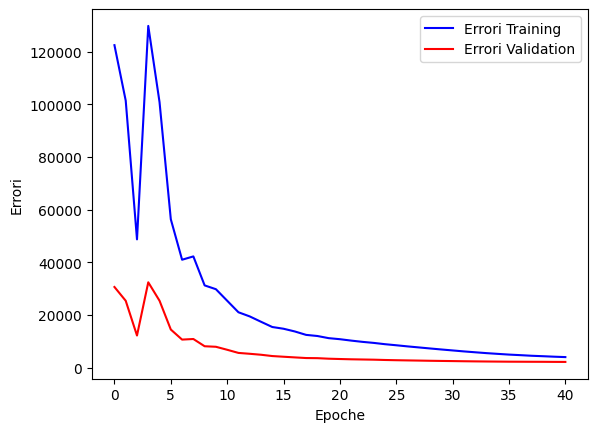

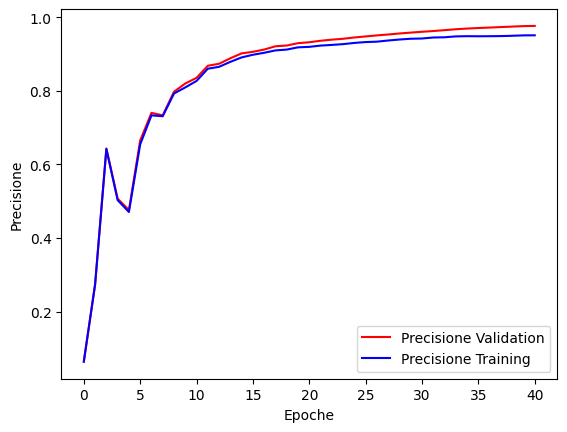

In [9]:
#Stampa grafico dell'errore ottenuto attraverso il training
plt.figure()
plt.plot(train_err, 'b', label='Errori Training')
plt.plot(validation_err, 'r', label='Errori Validation')
plt.xlabel('Epoche')
plt.ylabel('Errori')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_accuracy, 'r', label='Precisione Validation')
plt.plot(validation_accuracy, 'b', label='Precisione Training')
plt.xlabel('Epoche')
plt.ylabel('Precisione')
plt.legend()
plt.show()

In [10]:
#Stampa accuracy per training e test set
test_accuracy = lnf.network_accuracy(training_net, test_in, Ytest)
print('Test accuracy: ', test_accuracy)
accuracy_training = lnf.network_accuracy(training_net, train_in, train_labels)
print('Train accuracy: ', accuracy_training)

Test accuracy:  0.9439490445859873
Train accuracy:  0.9761036688264338


Probabilità predette dalla rete non addestrata:
Classe 0: 4.21556%
Classe 1: 27.2313%
Classe 2: 0.82725%
Classe 3: 2.39839%
Classe 4: 13.2743%
Classe 5: 9.00398%
Classe 6: 4.86326%
Classe 7: 5.23718%
Classe 8: 3.72928%
Classe 9: 29.2195%

Probabilità predette dalla rete addestrata:
Classe 0: 0.00015%
Classe 1: 0.00066%
Classe 2: 0.00014%
Classe 3: 99.52252%
Classe 4: 0.00015%
Classe 5: 0.43852%
Classe 6: 1e-05%
Classe 7: 3e-05%
Classe 8: 0.01606%
Classe 9: 0.02175%


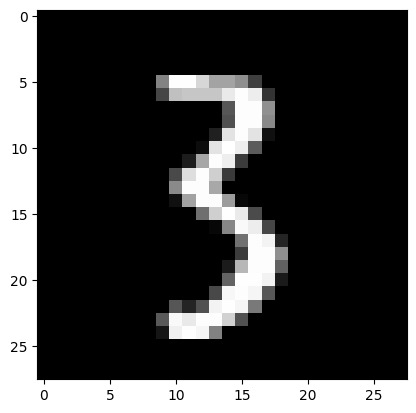

In [11]:
#Predizione rete senza addestramento e rete addestrata
image = 111
lnf.test_prediction(net, training_net, image, test_in)